In [6]:
import numpy as np
import math

def transform_to_cartesian(lat, lon):
    lat, lon = np.deg2rad(lat), np.deg2rad(lon)
    R = 6371 # radius of the earth
    x = R * np.cos(lat) * np.cos(lon)
    y = R * np.cos(lat) * np.sin(lon)
    z = R *np.sin(lat)
    return x,y,z

def normalize(v):
    norm = np.linalg.norm(v)
    if norm == 0: 
        return v
    return v / norm

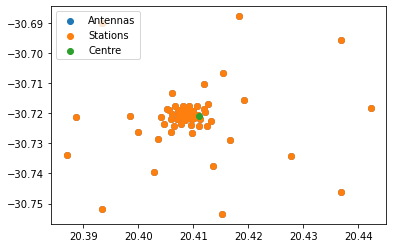

array([[-30.72107432,  20.40901091,   0.        ],
       [-30.72098992,  20.40935183,   0.        ],
       [-30.7212888 ,  20.4088483 ,   0.        ],
       [-30.72159821,  20.40905902,   0.        ],
       [-30.72211178,  20.40857281,   0.        ],
       [-30.7219181 ,  20.40828327,   0.        ],
       [-30.72116396,  20.40816517,   0.        ],
       [-30.72180572,  20.40713551,   0.        ],
       [-30.72184111,  20.40586606,   0.        ],
       [-30.72070901,  20.40743947,   0.        ],
       [-30.72020774,  20.40608824,   0.        ],
       [-30.72024446,  20.40762157,   0.        ],
       [-30.71974078,  20.40746623,   0.        ],
       [-30.71887048,  20.40722448,   0.        ],
       [-30.71847588,  20.40825763,   0.        ],
       [-30.71910563,  20.40889718,   0.        ],
       [-30.71840852,  20.40921642,   0.        ],
       [-30.71920474,  20.40992276,   0.        ],
       [-30.72004917,  20.40864071,   0.        ],
       [-30.71946408,  20.40826

In [2]:
from karabo.simulation import telescope, telescope_versions

tel = telescope.get_MEERKAT_Telescope()
tel.plot_telescope()

telescope_ll = np.array([[tel.centre_latitude, tel.centre_longitude, tel.centre_altitude]])

station_ll = np.array([[station.latitude, station.longitude, station.altitude] for station in tel.stations])

station_ll

In [3]:
station_pos = np.array([normalize(transform_to_cartesian(station[0], station[1])) for station in station_ll])
station_pos

array([[ 0.80570085,  0.29978171, -0.51085915],
       [ 0.80569977,  0.29978676, -0.51085788],
       [ 0.80569991,  0.29977875, -0.51086237],
       [ 0.80569622,  0.29978075, -0.51086701],
       [ 0.80569447,  0.29977232, -0.51087472],
       [ 0.8056976 ,  0.29976885, -0.51087181],
       [ 0.80570452,  0.29976953, -0.5108605 ],
       [ 0.80570455,  0.29975306, -0.51087012],
       [ 0.80571089,  0.2997351 , -0.51087066],
       [ 0.80571212,  0.29976074, -0.51085367],
       [ 0.80572338,  0.2997433 , -0.51084615],
       [ 0.80571505,  0.29976475, -0.5108467 ],
       [ 0.80572007,  0.29976413, -0.51083914],
       [ 0.80572861,  0.29976344, -0.51082608],
       [ 0.8057265 ,  0.29977919, -0.51082016],
       [ 0.80571789,  0.29978623, -0.51082961],
       [ 0.80572205,  0.29979288, -0.51081915],
       [ 0.8057117 ,  0.29980034, -0.5108311 ],
       [ 0.80571135,  0.29977969, -0.51084377],
       [ 0.80571822,  0.2997762 , -0.51083499],
       [ 0.8057134 ,  0.29977219, -0.510

In [5]:
import numpy as np
import pyvista
from ipygany import PolyMesh, Scene
from pyvista import examples

#point_cloud = np.random.random((100, 3))
#point_cloud = station_pos
#pdata = pyvista.PolyData(point_cloud)
#pdata['orig_sphere'] = np.arange(30)

# create many spheres from the point cloud
#sphere = pyvista.Sphere(radius=0.01, phi_resolution=10, theta_resolution=10)

globe_sphere = pyvista.Sphere(radius=1, phi_resolution=100, theta_resolution=100)

station_cone = pyvista.Cone()

cones = [pyvista.Cone(center=station, direction=station, height=0.1, radius=0.1) for station in station_pos]
#cones = [cone.scale([0.1, 0.1, 0.1], inplace=False) for cone in cones]

merged = station_cone.merge(cones)

#pc = pdata.glyph(scale=False, geom=cone)
#merged = globe_sphere.merge([pc])
mesh_globe = examples.download_topo_global()
print(mesh_globe)
#mesh_globe = PolyMesh.from_vtk(globe_sphere)
#mesh_globe.default_color = 'red'

#mesh = PolyMesh.from_vtk(merged)
#mesh.default_color = 'white'
#
#scene = Scene([mesh_globe])
#scenepl = 
pl = pyvista.Plotter()
pl.add_mesh(mesh_globe)
pl.camera_position = 'xy'
pl.show(jupyter_backend='pythreejs')


PolyData (0x7fb900bf72e0)
  N Cells:	2333880
  N Points:	2336041
  X Bounds:	-1.000e+00, 1.000e+00
  Y Bounds:	-1.000e+00, 1.000e+00
  Z Bounds:	-1.000e+00, 1.000e+00
  N Arrays:	1



Renderer(camera=PerspectiveCamera(aspect=1.3333333333333333, children=(DirectionalLight(intensity=0.25, positi…

In [6]:
import pyvista as pv
from pyvista import examples

mesh = examples.download_topo_global()
mesh.compute_normals(inplace=True)  # this activates the normals as well

# Now use those normals to warp the surface
warp = mesh.warp_by_scalar(factor=0.5e-5)


#stations
cones = [pyvista.Cone(center=station, direction=station, height=1, radius=0.001) for station in station_pos]
merged = cones[0].merge(cones[1:])

pl = pv.Plotter()
pl.add_mesh(warp)
pl.add_mesh(merged)
pl.camera_position = 'xy'
pl.show(jupyter_backend='pythreejs')

Renderer(camera=PerspectiveCamera(aspect=1.3333333333333333, children=(DirectionalLight(intensity=0.25, positi…

In [7]:
def find_min_max_long_lat(stations):
    lats = stations[:,0]
    longs = stations[:,1]
    return (np.min(lats), np.min(longs), np.max(lats), np.max(longs))
    
min_lat, max_lat, min_long, max_long = find_min_max_long_lat(station_ll)

In [8]:
centre_plane = transform_to_cartesian(tel.centre_latitude, tel.centre_longitude)

In [9]:
import pyvista as pv
from pyvista import examples
scale = 20
planeMesh = pv.Plane(center=centre_plane, direction=centre_plane, i_size=scale, j_size=scale)
#mesh = examples.download_topo_global()
#mesh.compute_normals(inplace=True)  # this activates the normals as well
#
## Now use those normals to warp the surface
#warp = mesh.warp_by_scalar(factor=0.5e-5)
#

#stations

scaled_pos = [station*scale for station in station_pos]
cones = [pyvista.Cone(center=station, direction=station, height=0.0001, radius=0.0001) for station in scaled_pos]
merged = cones[0].merge(cones[1:])
mm = merged.merge(planeMesh)

pl = pv.Plotter()
#pl.add_mesh(warp)

#pl.add_mesh(mm)
#pl.add_mesh(planeMesh)
pl.add_mesh(merged)
pl.background_color='grey'
pl.camera_position = 'xy'
pl.show(jupyter_backend='pythreejs')

Renderer(camera=PerspectiveCamera(aspect=1.3333333333333333, children=(DirectionalLight(intensity=0.25, positi…

In [1]:
from karabo.simulation.sky_model import get_GLEAM_Sky, SkyModel

In [ ]:
sky = get_GLEAM_Sky()
sky.filter_by_flux(0, 500)
sky.plot_sky([250, -80])


In [ ]:
cartesian = sky.get_cartesian_sky()
cartesian
len(cartesian)
len(sky[:,2])

In [ ]:
import pyvista

cartesian_scaled = cartesian * 1000


sources = pyvista.PointSet(cartesian_scaled)
scalars = np.repeat(sky[:,2], 82, axis=0)

sphere = pyvista.Sphere(radius=0.001, phi_resolution=10, theta_resolution=10)
pdata = pyvista.PolyData(cartesian)
spheres = pdata.glyph(scale=False, geom=sphere)
spheres.plot(scalars=scalars)
#merged = spheres[0].merge(spheres[1:])
#sources.plot(scalars=sky[:,2])
#pl = pv.Plotter()
#pl.add_mesh(spheres)
#pl.background_color='grey'
#pl.camera_position = 'xy'
#pl.show(jupyter_backend='pythreejs')

In [ ]:
import time

import pyvista as pv
from pyvista import examples

lidar = examples.download_lidar()
print(lidar)
tstart = time.time()
clipped = lidar.clip(origin=(0, 0, 1.76e3), normal=(0, 0, 1))
t_elapsed = time.time() - tstart
print(f"Time to clip with a PolyData {t_elapsed:.2f} seconds.")

In [ ]:
clipped.plot()

In [ ]:
import srtm
geo_elevation_data = srtm.get_data()
image = geo_elevation_data.get_image((100, 100),  (math.floor(min_lat), math.ceil(max_lat)), (math.floor(min_long), math.ceil(max_long)), 300)
# the image s a standard PIL object, you can save or show it:
image.show()